In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [3]:
# 주가 데이터
stock = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/KOSPI.csv')
stock.head()

,Date,Open,High,Low,Close,Volume,DataSplit
0,2014-09-30,2023.18,2029.17,2007.30,2020.09,322812,0
1,2014-10-01,2013.47,2013.47,1989.84,1991.54,351581,0
2,2014-10-02,1984.43,1985.06,1966.17,1976.16,322656,0
3,2014-10-06,1987.89,1988.39,1968.30,1968.39,325078,0
4,2014-10-07,1979.83,1982.96,1966.22,1972.91,328234,0


In [4]:
# 코스피 지수
stock['Date'] = pd.to_datetime(stock['Date']) # 시계열 데이터로 변환
stock['Year'] = stock['Date'].dt.year
stock['Month'] = stock['Date'].dt.month
stock['Weekday'] = stock['Date'].dt.weekday # 0 ~ 6까지 월요일 ~ 일요일
stock.head()

,Date,Open,High,Low,Close,Volume,DataSplit,Year,Month,Weekday
0,2014-09-30,2023.18,2029.17,2007.30,2020.09,322812,0,2014,9,1
1,2014-10-01,2013.47,2013.47,1989.84,1991.54,351581,0,2014,10,2
2,2014-10-02,1984.43,1985.06,1966.17,1976.16,322656,0,2014,10,3
3,2014-10-06,1987.89,1988.39,1968.30,1968.39,325078,0,2014,10,0
4,2014-10-07,1979.83,1982.96,1966.22,1972.91,328234,0,2014,10,1


## 1. 교차표 (crosstab)

- pd.crosstab(행, 열, normalize = )

In [5]:
# 두 범주별 빈도수를 교차표로 만들기
pd.crosstab(titanic['Survived'], titanic['Sex']) # 1:생존, 0:사망

Sex,female,male
Survived,,
0,81,468
1,233,109


In [6]:
pd.crosstab(titanic['Survived'], titanic['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


- x를 기준으로 y의 비율 살펴보기

In [7]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


In [8]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.271930,0.087719,0.640351


In [9]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


## 2. pivot + heatmap : 두 범주 집계 시각화

- 두 범주를 집계한 결과를 색의 농도로 표현.
- groupby와 pivot을 먼저 만들어야 한다.
- 여러 범주를 갖는 변수 비교 시 유용.

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [11]:
temp1 = titanic.groupby(['Embarked','Pclass'], as_index = False)['PassengerId'].count()
temp1.head()

,Embarked,Pclass,PassengerId
0,C,1,85
1,C,2,17
2,C,3,66
3,Q,1,2
4,Q,2,3


In [12]:
temp1.pivot('Embarked','Pclass', 'PassengerId')

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         129  164  353


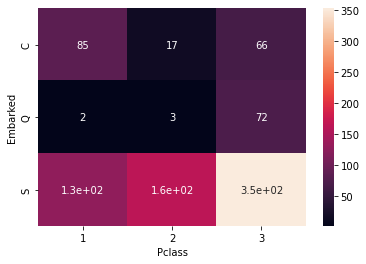

In [13]:
temp1 = titanic.groupby(['Embarked','Pclass'], as_index = False)['PassengerId'].count()
temp2 = temp1.pivot('Embarked','Pclass', 'PassengerId')
print(temp2)

sns.heatmap(temp2, annot = True)
plt.show()

## 3. 시계열 데이터

In [14]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path, usecols = ['date',	'comp_sales'])
data = data.loc[data['date']<= '2015-12-31'].reset_index(drop = True)
data.columns = ['date',	'sales']
data.head(10)

,date,sales
0,2013-01-01,43
1,2013-01-02,57
2,2013-01-03,45
3,2013-01-04,45
4,2013-01-05,55
5,2013-01-06,56
6,2013-01-07,35
7,2013-01-08,50
8,2013-01-09,41
9,2013-01-10,68


In [15]:
data['date'] = pd.to_datetime(data['date'])

### 1) 날짜 요소 뽑기

In [16]:
# 요일
data['date'].dt.day_name()

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
1090       Sunday
1091       Monday
1092      Tuesday
1093    Wednesday
1094     Thursday
Name: date, Length: 1095, dtype: object

In [17]:
# 문자열 길이를 첫 3글자로 잘라 저장
# .str.slice(시작, 끝)
data['date'].dt.day_name().str.slice(0, 3)

0       Tue
1       Wed
2       Thu
3       Fri
4       Sat
       ... 
1090    Sun
1091    Mon
1092    Tue
1093    Wed
1094    Thu
Name: date, Length: 1095, dtype: object

In [18]:
data['weekday'] = data['date'].dt.day_name().str.slice(0, 3)
data.head()

,date,sales,weekday
0,2013-01-01,43,Tue
1,2013-01-02,57,Wed
2,2013-01-03,45,Thu
3,2013-01-04,45,Fri
4,2013-01-05,55,Sat


### 2) shift

In [19]:
temp = data[['date', 'sales']].copy()
temp.head()

,date,sales
0,2013-01-01,43
1,2013-01-02,57
2,2013-01-03,45
3,2013-01-04,45
4,2013-01-05,55


In [20]:
# shift(1)
temp['lag1'] = temp['sales'].shift()

# shift(2)
temp['lag2'] = temp['sales'].shift(2)

# shift(-1)
temp['lag_1'] = temp['sales'].shift(-1)
temp.head()

,date,sales,lag1,lag2,lag_1
0,2013-01-01,43,NaN,NaN,57.0
1,2013-01-02,57,43.0,NaN,45.0
2,2013-01-03,45,57.0,43.0,45.0
3,2013-01-04,45,45.0,57.0,55.0
4,2013-01-05,55,45.0,45.0,56.0


In [21]:
# 7일 전 판매량
data['lag7'] = data['sales'].shift(7)
data.head(10)

,date,sales,weekday,lag7
0,2013-01-01,43,Tue,NaN
1,2013-01-02,57,Wed,NaN
2,2013-01-03,45,Thu,NaN
3,2013-01-04,45,Fri,NaN
4,2013-01-05,55,Sat,NaN
5,2013-01-06,56,Sun,NaN
6,2013-01-07,35,Mon,NaN
7,2013-01-08,50,Tue,43.0
8,2013-01-09,41,Wed,57.0
9,2013-01-10,68,Thu,45.0


### 3) diff
- 특정 시점 대비 증감

In [22]:
temp = data[['date', 'sales']].copy()
temp.head()

,date,sales
0,2013-01-01,43
1,2013-01-02,57
2,2013-01-03,45
3,2013-01-04,45
4,2013-01-05,55


In [23]:
# 전일대비 증감
data['Diff1'] = data['sales'].diff()
data['Diff1_2'] = data['sales'] - data['sales'].shift()

data.head()

,date,sales,weekday,lag7,Diff1,Diff1_2
0,2013-01-01,43,Tue,NaN,NaN,NaN
1,2013-01-02,57,Wed,NaN,14.0,14.0
2,2013-01-03,45,Thu,NaN,-12.0,-12.0
3,2013-01-04,45,Fri,NaN,0.0,0.0
4,2013-01-05,55,Sat,NaN,10.0,10.0


In [24]:
# 7일 대비 증가
data['Diff7'] = data['sales'].diff(7)

data.head(10)

,date,sales,weekday,lag7,Diff1,Diff1_2,Diff7
0,2013-01-01,43,Tue,NaN,NaN,NaN,NaN
1,2013-01-02,57,Wed,NaN,14.0,14.0,NaN
2,2013-01-03,45,Thu,NaN,-12.0,-12.0,NaN
3,2013-01-04,45,Fri,NaN,0.0,0.0,NaN
4,2013-01-05,55,Sat,NaN,10.0,10.0,NaN
5,2013-01-06,56,Sun,NaN,1.0,1.0,NaN
6,2013-01-07,35,Mon,NaN,-21.0,-21.0,NaN
7,2013-01-08,50,Tue,43.0,15.0,15.0,7.0
8,2013-01-09,41,Wed,57.0,-9.0,-9.0,-16.0
9,2013-01-10,68,Thu,45.0,27.0,27.0,23.0
